In [1]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score as r2
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

In [3]:
pip install scikeras==0.1.8

     ------------------------------------- 895.7/895.7 kB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


Error processing line 3 of C:\Users\hp\anaconda3\lib\site-packages\googleapis_common_protos-1.59.1-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\hp\anaconda3\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.

[notice] A new release of pip available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import scikeras
from sklearn.model_selection import train_test_split, GridSearchCV

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.metrics import Recall, RecallAtPrecision
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Load data
df = pd.read_csv("C:/Users/hp/Downloads/address_data_combined.csv")

# Split data into features and target
X = df.drop(columns=['Address', 'FLAG'])
y = df['FLAG']

# Split data into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define columns for scaling
columns = ['Avg min between sent tnx', 'Avg min between received tnx',
           'Time Diff between first and last (Mins)',
           'Unique Received From Addresses', 'min value received',
           'max value received ', 'avg val received', 'min val sent',
           'avg val sent', 'total transactions (including tnx to create contract',
           'total ether received', 'total ether balance']

# Log transformation for skewed data
for c in columns:
    X_train_full[c] = X_train_full[c].apply(lambda x: np.log(x) if x > 0 else 0)
    X_test[c] = X_test[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling
scaler = MinMaxScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Define function to build and compile Keras model
def build_mlp(input_dim, H, num_layers, activation, dropout_probability):
    model = Sequential()
    model.add(layers.Dense(H, input_dim=input_dim, activation=activation))

    for _ in range(num_layers - 1):
        model.add(layers.Dense(H, activation=activation, kernel_constraint=MaxNorm(3)))
        model.add(layers.Dropout(dropout_probability))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[RecallAtPrecision(0.75)])
    return model

# Create KerasClassifier with input_dim parameter
model = KerasClassifier(build_fn=build_mlp, verbose=0, input_dim=X_train_full.shape[1])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'H': [40, 50, 60, 70, 80],
    'num_layers': [7, 8, 9, 10, 11, 12],
    'dropout_probability': [0.2, 0.3]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, scoring='f1')
grid_result = grid.fit(X_train_full, y_train_full)

# Print best parameters and best score
print("Best parameters found: ", grid_result.best_params_)
print("Best F1 score found: ", grid_result.best_score_)


C:\Users\hp\AppData\Local\Temp\ipykernel_12248\3211713057.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_mlp, verbose=0, input_dim=X_train_full.shape[1])


Fitting 5 folds for each of 180 candidates, totalling 900 fits
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.2, num_layers=7; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.2, num_layers=7; total time=   2.3s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.2, num_layers=7; total time=   2.1s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.2, num_layers=7; total time=   2.1s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.2, num_layers=7; total time=   2.1s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.2, num_layers=8; total time=   2.3s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=

62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.3, num_layers=12; total time=   2.9s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.3, num_layers=12; total time=   3.0s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=relu, dropout_probability=0.3, num_layers=12; total time=   2.9s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_layers=7; total time=   2.0s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_layers=7; total time=   2.1s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_layers=7; total time=   2.1s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=tanh, dropout_probability=0.2, num_layers=7; total time=   2

62/62 [==============================] - 0s 3ms/step
[CV] END H=40, activation=sigmoid, dropout_probability=0.3, num_layers=11; total time=   2.8s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=sigmoid, dropout_probability=0.3, num_layers=11; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=sigmoid, dropout_probability=0.3, num_layers=11; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=sigmoid, dropout_probability=0.3, num_layers=11; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=sigmoid, dropout_probability=0.3, num_layers=11; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=sigmoid, dropout_probability=0.3, num_layers=12; total time=   2.8s
62/62 [==============================] - 0s 2ms/step
[CV] END H=40, activation=sigmoid, dropout_probability=0.3, num_l

62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=relu, dropout_probability=0.3, num_layers=10; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=relu, dropout_probability=0.3, num_layers=10; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=relu, dropout_probability=0.3, num_layers=10; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=relu, dropout_probability=0.3, num_layers=11; total time=   2.8s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=relu, dropout_probability=0.3, num_layers=11; total time=   2.8s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=relu, dropout_probability=0.3, num_layers=11; total time=   2.8s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=relu, dropout_probability=0.3, num_layers=11; total time=

62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=sigmoid, dropout_probability=0.3, num_layers=9; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=sigmoid, dropout_probability=0.3, num_layers=9; total time=   2.5s
62/62 [==============================] - 0s 3ms/step
[CV] END H=50, activation=sigmoid, dropout_probability=0.3, num_layers=9; total time=   2.9s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=sigmoid, dropout_probability=0.3, num_layers=9; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=sigmoid, dropout_probability=0.3, num_layers=9; total time=   2.5s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=sigmoid, dropout_probability=0.3, num_layers=10; total time=   3.0s
62/62 [==============================] - 0s 2ms/step
[CV] END H=50, activation=sigmoid, dropout_probability=0.3, num_layers

62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=relu, dropout_probability=0.3, num_layers=8; total time=   2.5s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=relu, dropout_probability=0.3, num_layers=8; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=relu, dropout_probability=0.3, num_layers=8; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=relu, dropout_probability=0.3, num_layers=9; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=relu, dropout_probability=0.3, num_layers=9; total time=   2.6s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=relu, dropout_probability=0.3, num_layers=9; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=relu, dropout_probability=0.3, num_layers=9; total time=   2.6s

62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=sigmoid, dropout_probability=0.3, num_layers=7; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=sigmoid, dropout_probability=0.3, num_layers=7; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=sigmoid, dropout_probability=0.3, num_layers=7; total time=   2.3s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=sigmoid, dropout_probability=0.3, num_layers=7; total time=   2.2s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=sigmoid, dropout_probability=0.3, num_layers=8; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=60, activation=sigmoid, dropout_probability=0.3, num_layers=8; total time=   2.4s
62/62 [==============================] - 0s 3ms/step
[CV] END H=60, activation=sigmoid, dropout_probability=0.3, num_layers=

62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=relu, dropout_probability=0.2, num_layers=12; total time=   3.7s
62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=relu, dropout_probability=0.2, num_layers=12; total time=   3.5s
62/62 [==============================] - 0s 2ms/step
[CV] END H=70, activation=relu, dropout_probability=0.3, num_layers=7; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=70, activation=relu, dropout_probability=0.3, num_layers=7; total time=   2.4s
62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=relu, dropout_probability=0.3, num_layers=7; total time=   2.7s
62/62 [==============================] - 0s 2ms/step
[CV] END H=70, activation=relu, dropout_probability=0.3, num_layers=7; total time=   2.4s
62/62 [==============================] - 0s 2ms/step
[CV] END H=70, activation=relu, dropout_probability=0.3, num_layers=7; total time=   2.

62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=sigmoid, dropout_probability=0.2, num_layers=11; total time=   3.3s
62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=sigmoid, dropout_probability=0.2, num_layers=11; total time=   3.3s
62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=sigmoid, dropout_probability=0.2, num_layers=11; total time=   3.3s
62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=sigmoid, dropout_probability=0.2, num_layers=12; total time=   3.6s
62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=sigmoid, dropout_probability=0.2, num_layers=12; total time=   3.5s
62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=sigmoid, dropout_probability=0.2, num_layers=12; total time=   3.6s
62/62 [==============================] - 0s 3ms/step
[CV] END H=70, activation=sigmoid, dropout_probability=0.2, num_l

62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=tanh, dropout_probability=0.2, num_layers=10; total time=   3.2s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=tanh, dropout_probability=0.2, num_layers=10; total time=   3.2s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=tanh, dropout_probability=0.2, num_layers=10; total time=   3.4s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=tanh, dropout_probability=0.2, num_layers=10; total time=   3.4s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=tanh, dropout_probability=0.2, num_layers=10; total time=   3.3s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=tanh, dropout_probability=0.2, num_layers=11; total time=   3.5s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=tanh, dropout_probability=0.2, num_layers=11; total time=

62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=sigmoid, dropout_probability=0.2, num_layers=9; total time=   3.2s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=sigmoid, dropout_probability=0.2, num_layers=9; total time=   3.2s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=sigmoid, dropout_probability=0.2, num_layers=9; total time=   3.2s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=sigmoid, dropout_probability=0.2, num_layers=10; total time=   3.5s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=sigmoid, dropout_probability=0.2, num_layers=10; total time=   3.6s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=sigmoid, dropout_probability=0.2, num_layers=10; total time=   3.4s
62/62 [==============================] - 0s 3ms/step
[CV] END H=80, activation=sigmoid, dropout_probability=0.2, num_laye

In [18]:
best_mlp = grid.best_estimator_
best_mlp

In [19]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_H,param_activation,param_dropout_probability,param_num_layers,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.944245,0.104044,0.321640,0.025026,40,relu,0.2,7,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.823940,0.820259,0.805933,0.829462,0.862032,0.828325,0.018564,42
1,2.046197,0.032165,0.304265,0.006673,40,relu,0.2,8,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.839687,0.835639,0.842161,0.846018,0.852974,0.843296,0.005899,19
2,2.319583,0.088087,0.336092,0.012104,40,relu,0.2,9,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.834844,0.827108,0.831603,0.832363,0.845702,0.834324,0.006214,34
3,2.422368,0.058514,0.344238,0.009070,40,relu,0.2,10,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.821166,0.843262,0.844376,0.822420,0.850840,0.836413,0.012221,32
4,2.636392,0.036284,0.367622,0.021373,40,relu,0.2,11,"{'H': 40, 'activation': 'relu', 'dropout_proba...",0.838077,0.809017,0.818028,0.778199,0.853595,0.819383,0.025789,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.011788,0.049952,0.523738,0.033209,80,sigmoid,0.3,8,"{'H': 80, 'activation': 'sigmoid', 'dropout_pr...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138
176,4.446113,0.068553,0.541599,0.035964,80,sigmoid,0.3,9,"{'H': 80, 'activation': 'sigmoid', 'dropout_pr...",0.000000,0.609123,0.634045,0.000000,0.000000,0.248634,0.304615,122
177,4.747193,0.096980,0.570165,0.018853,80,sigmoid,0.3,10,"{'H': 80, 'activation': 'sigmoid', 'dropout_pr...",0.000000,0.609123,0.000000,0.000000,0.000000,0.121825,0.243649,133
178,5.346683,0.211701,0.689892,0.075299,80,sigmoid,0.3,11,"{'H': 80, 'activation': 'sigmoid', 'dropout_pr...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138


In [20]:
results.to_csv('mlp-grid.csv')

In [21]:
best_mlp.score(X_test, y_test)

ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

In [22]:
model_tuned = compile_mlp(X_train_full.shape[1], 60, 75, 10, 'relu', 0.2)
model_tuned.fit(X_train_full, y_train_full)

310/310 [==============================] - 4s 6ms/step - loss: 0.5273 - recall_at_precision_1: 0.5875


In [23]:
from sklearn.metrics import accuracy_score
predicted_y = model_tuned.predict(X_test)
predicted_y = (predicted_y > 0.5).astype('int32')
accuracy_score(predicted_y, y_test)

133/133 [==============================] - 1s 3ms/step


0.8542500588650812

In [25]:
pip install shap

Error processing line 3 of C:\Users\hp\anaconda3\lib\site-packages\googleapis_common_protos-1.59.1-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\hp\anaconda3\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] A new release of pip available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------- 453.1/453.1 kB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 7.7 MB/s eta 0:00:00
     --------------------------------------- 28.1/28.1 MB 12.3 MB/s eta 0:00:00


In [26]:
import shap
shap.initjs()

In [27]:
explainer = shap.Explainer(model_tuned, X_train_full, feature_names=X.columns)
shap_values500 = explainer(X_train_full[:500])

PermutationExplainer explainer: 501it [03:25,  2.38it/s]                                                               


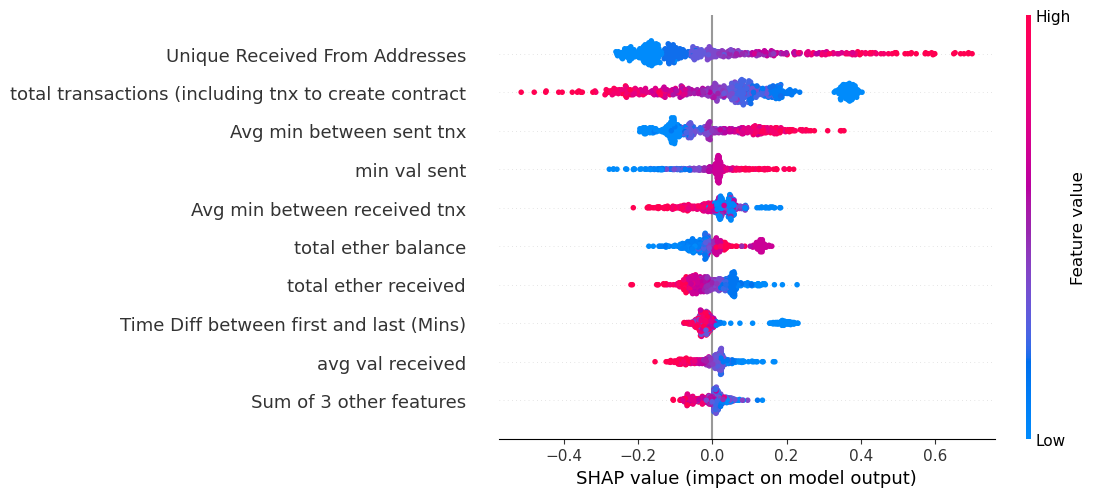

In [29]:
f = shap.plots.beeswarm(shap_values500,show=False)


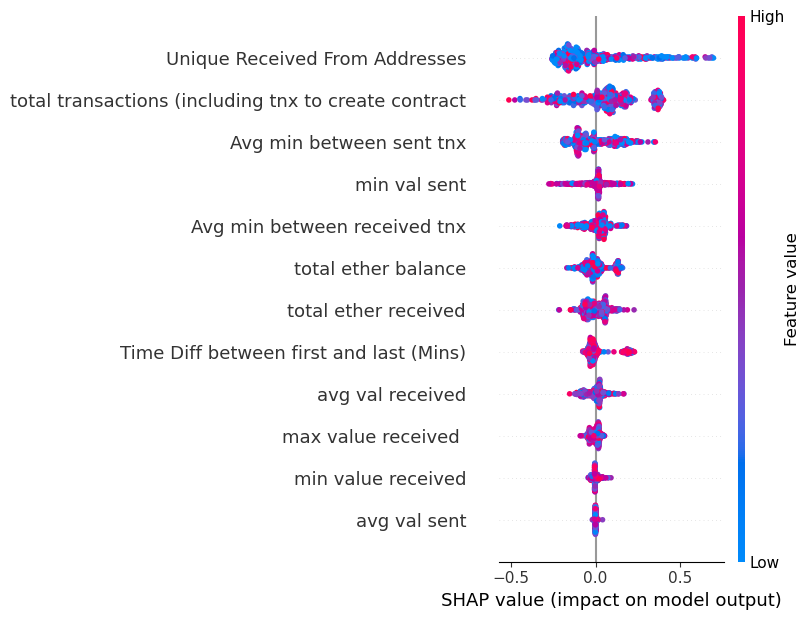

In [30]:
shap.summary_plot(shap_values500,X_test[:500],feature_names=X.columns)